### 1.采集人脸样本

In [2]:
# 系统操作
import os
# 判断文件类型
import imghdr
from imutils import *

In [3]:
# 人脸检测并保存人脸
def facedetect(image, output):
    # 获取文件名
    name = os.path.basename(image)
    # 读入图片
    image = cv2.imread(image)
    # 变成灰度图
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # 级联分类器，检测人脸
    detector = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
    rects = detector.detectMultiScale(image, scaleFactor=1.1, minNeighbors=3, minSize=(20, 20), flags=cv2.CASCADE_SCALE_IMAGE)
    # 循环每个人脸
    for (x,y,w,h) in rects:
        # 截取人脸，并且都转化为200*200的固定大小
        f = cv2.resize(image[y:y+h, x:x+w], (200,200))
        # 写入指定路径
        cv2.imwrite(os.path.join(output, name), f)

In [4]:
# 检测并截取人脸
def predict_face(path, output):
    # 如果该文件夹不存在则创建文件夹
    if not os.path.exists(output):
        os.makedirs(output)
    # 循环每个人物的文件夹下的图片
    for files in os.listdir(path):
        # 检测是不是文件夹
        if os.path.isdir(os.path.join(path, files)):
            # 定义截取到的人脸的输出路径
            output2 = os.path.join(output, files)
            # 如果该文件夹不存在则创建文件夹
            if not os.path.exists(output2):
                os.makedirs(output2)
            # 人物文件夹的完整路径
            files = os.path.join(path, files)
            # 循环每个人的每张照片
            for file in os.listdir(files):
                # 照片完整路径
                file = os.path.join(files, file)
                # 检测人脸并保存
                facedetect(file, output2)

In [5]:
predict_face('faces', 'predict_faces')

### 2.生成label

In [6]:
# 生成label文件
def get_label(path):
    fh = open("label.txt", 'w')
    # 表示人脸label
    label = 0
    for root, dirs, files in os.walk(path):
        # 循环每个文件夹
        for subdir in dirs:
            # 文件夹完整路径
            subdir_path = os.path.join(root,subdir)
            # 循环每个人物文件夹下面每张照片
            for file in os.listdir(subdir_path):
                # 照片完整路径
                filepath = os.path.join(subdir_path, file)
                # 判断文件类型是不是图片类型
                imgType = imghdr.what(filepath)
                if imgType == 'jpeg' or imgType == 'png':
                    # 保存图片路径
                    fh.write(filepath);
                    fh.write(";")
                    # 标签
                    fh.write(str(label))
                    fh.write("\n")
            # 每个人的标签不一样，从0开始计数
            label = label + 1            
    fh.close()

In [7]:
get_label('predict_faces')

### 3.训练自己的数据模型

In [8]:
# 保存图片数据
images = []
# 保存标签
labels = []
# 打开文件
fh = open("label.txt")
# 循环每一行
for line in fh:
    # 以;切分字符串
    arr = line.split(";")
    # 第0部分为图片路径，读取文件
    img = cv2.imread(arr[0],0)
    # 保存图片数据
    images.append(img)
    # 保存对应的标签数据
    labels.append(int(arr[1]))
    
# 安装opencv扩展包
# pip install opencv-contrib-python
# 定义人脸识别模型
model = cv2.face.EigenFaceRecognizer_create()
# model = cv2.face.FisherFaceRecognizer_create()
# model = cv2.face.LBPHFaceRecognizer_create()
# 训练模型
model.train(np.array(images), np.array(labels))
# 保存模型
model.save("predict_face_XiaoMing_AB.xml")

### 4.人脸识别

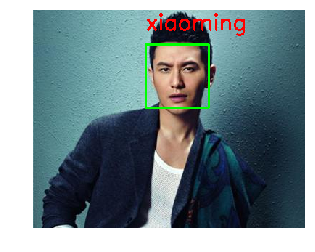

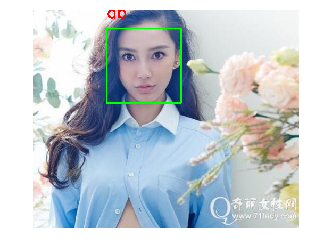

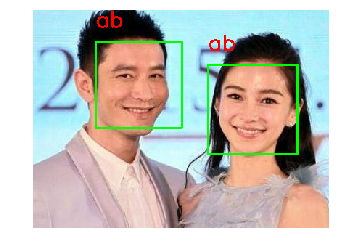

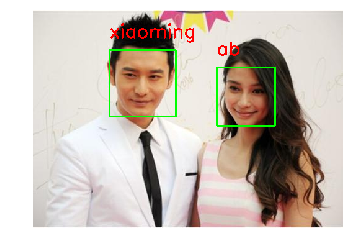

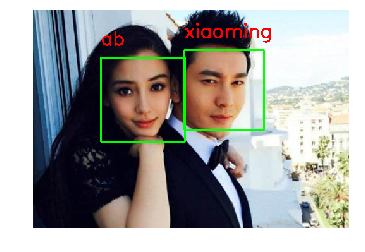

In [9]:
# 定义人物名字
name= ['ab','xiaoming']
# 定义人脸识别模型
model = cv2.face.EigenFaceRecognizer_create()
# 载入训练好的模型
model.read('predict_face_XiaoMing_AB.xml')

# 读入测试图片来做测试
for file in os.listdir('test'):
    file = os.path.join('test', file)
    # 判断文件类型
    imgType = imghdr.what(file)
    if imgType == 'jpeg' or imgType == 'png':
        # 读入图片
        image = imread(file)
        # 变为灰度图
        gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        # 级联分类器
        detector = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
        rects = detector.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(20, 20), flags=cv2.CASCADE_SCALE_IMAGE)
        # 循环每个人脸
        for (x,y,w,h) in rects:
            # 画矩形框
            cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)
            # 人脸识别
            face = cv2.resize(gray[y:y+h,x:x+w], (200,200))
            # 预测人物
            params = model.predict(face)
            # 写上人物名字
            cv2.putText(image,name[params[0]],(x,y-20),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2)
        show(image)